<a href="https://colab.research.google.com/github/Slrosales/Optimizacion_Teamwork/blob/main/Teamwork_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import os

In [ ]:
path_ = 'drive/MyDrive/imgs'

In [ ]:
df_ = pd.read_csv(f"{path_}/iris.csv")

In [ ]:
images_ = []
reshape_size = (128, 128)

for index, row in df_.iterrows():
    name = row['num']
    label = row['label']
    if label == 0:
        image_path = os.path.join(path_, "flores", f"{name}.jfif")
    else:
        image_path = os.path.join(path_, "flores", f"{name}.jpg")

    image = cv2.imread(image_path)
    if image is not None:
        resized_image = cv2.resize(image, reshape_size)
        images_.append(resized_image)

images = np.array(images_, dtype='float32')




In [ ]:
images.shape

(33, 128, 128, 3)

array([[[36, 31, 28],
        [36, 31, 28],
        [36, 31, 28],
        ...,
        [36, 31, 28],
        [36, 31, 28],
        [36, 31, 28]],

       [[36, 31, 28],
        [36, 31, 28],
        [36, 31, 28],
        ...,
        [36, 31, 28],
        [36, 31, 28],
        [36, 31, 28]],

       [[36, 31, 28],
        [36, 31, 28],
        [36, 31, 28],
        ...,
        [36, 31, 28],
        [36, 31, 28],
        [36, 31, 28]],

       ...,

       [[35, 30, 27],
        [35, 30, 27],
        [35, 30, 27],
        ...,
        [36, 31, 28],
        [36, 31, 28],
        [36, 31, 28]],

       [[35, 30, 27],
        [35, 30, 27],
        [35, 30, 27],
        ...,
        [36, 31, 28],
        [36, 31, 28],
        [36, 31, 28]],

       [[36, 31, 28],
        [36, 31, 28],
        [36, 31, 28],
        ...,
        [36, 31, 28],
        [36, 31, 28],
        [36, 31, 28]]], dtype=uint8)
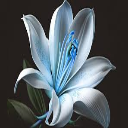

In [ ]:
images_[10]

In [ ]:
X = images
y = np.array(df_['label'].values, dtype='float32')

In [ ]:
df_['num'].nunique()

33

In [ ]:
label_ = {
    0: 'otras',
    1: 'iris',
}


#CNN 1
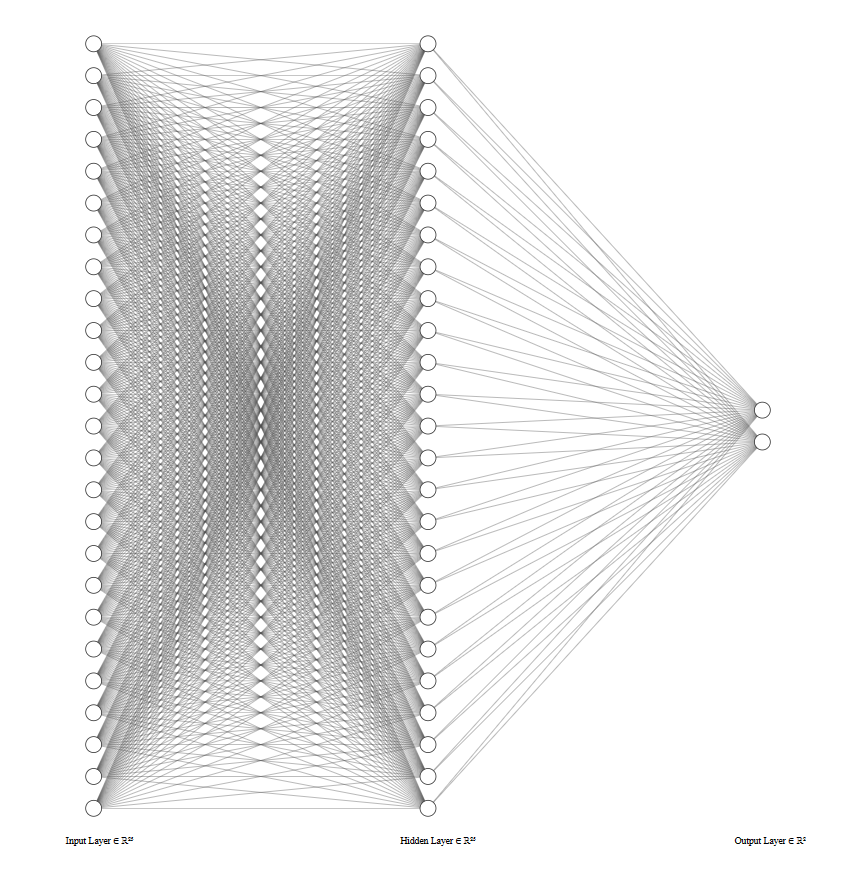

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=10)

In [ ]:
model = models.Sequential(
    [
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(25, activation='relu'),
        layers.Dense(25, activation='relu'),
        layers.Dense(2, activation='softmax')
    ]
)

In [ ]:
acc = []
for k in range(5):
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model.fit(Xtrain, ytrain, epochs=10, validation_data=(Xtest, ytest))
  acc.append(model.evaluate(Xtest, ytest))

Epoch 1/10
1/1 [==============================] - 1s 947ms/step - loss: 6.9585 - accuracy: 0.4138 - val_loss: 422.4901 - val_accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 0s 95ms/step - loss: 763.9973 - accuracy: 0.4483 - val_loss: 997.1136 - val_accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 0s 93ms/step - loss: 729.8718 - accuracy: 0.5517 - val_loss: 725.7163 - val_accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 0s 90ms/step - loss: 496.4329 - accuracy: 0.5517 - val_loss: 275.4295 - val_accuracy: 0.2500
Epoch 5/10
1/1 [==============================] - 0s 88ms/step - loss: 150.9700 - accuracy: 0.6552 - val_loss: 178.9755 - val_accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 96ms/step - loss: 296.3021 - accuracy: 0.4483 - val_loss: 105.4222 - val_accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 87ms/step - loss: 167.6598 - accuracy: 0.4828 - val_loss: 12.7986 - val_accuracy: 0.7500
E

In [ ]:
acc_d = acc[1:]
acc_array = np.array(acc_d)
averages = np.mean(acc_array, axis=0)
print("Promedios por posición:", averages)

[0.0, 1.0]

In [ ]:
list(label_.keys())[np.argmax(model.predict(images_[4].reshape(1, 128, 128, 3)))]

1/1 [==============================] - 0s 70ms/step


0

# CNN 2
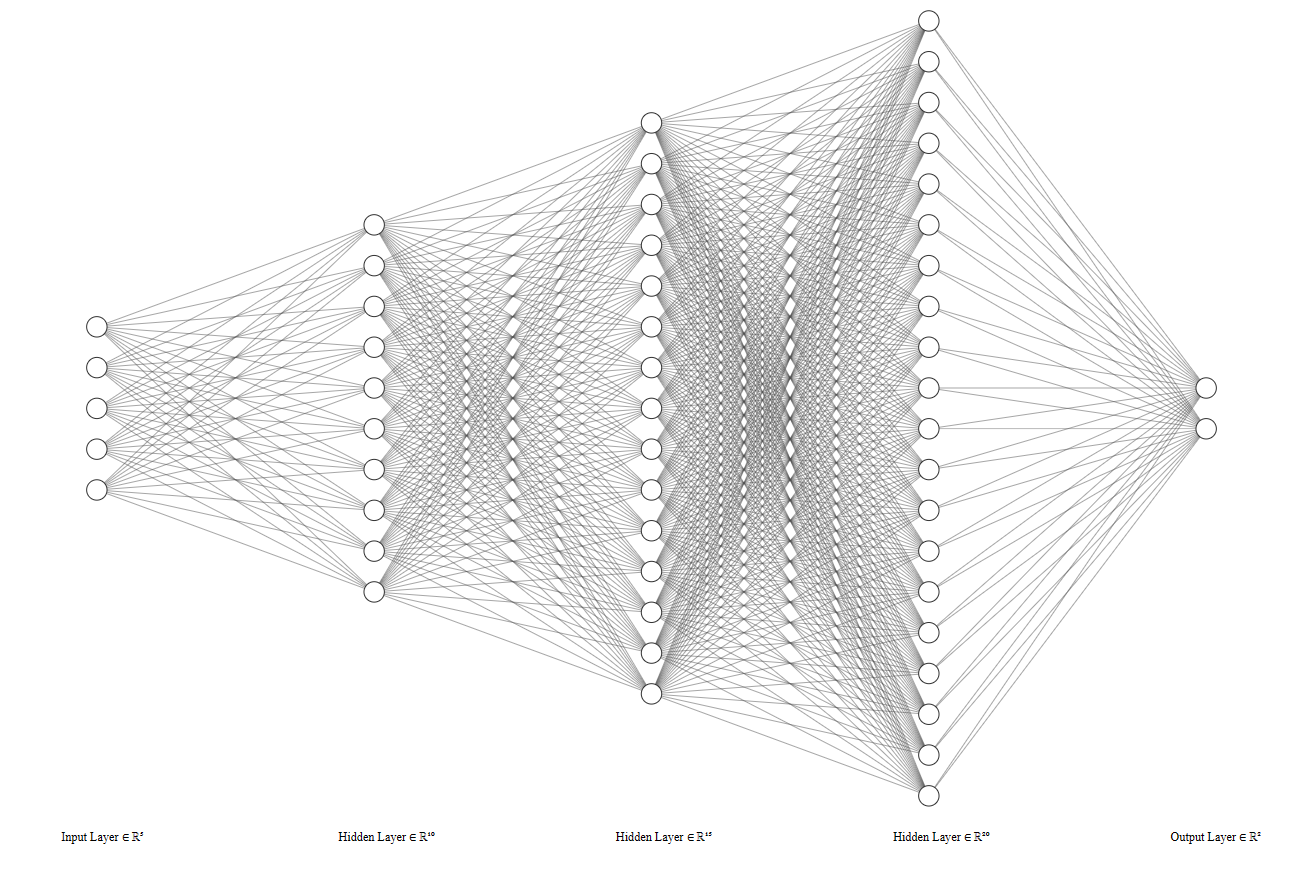

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=10)

In [ ]:
model = models.Sequential(
    [
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(5, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(15, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(2, activation='softmax')
    ]
)

In [ ]:
acc = []
for k in range(5):
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model.fit(Xtrain, ytrain, epochs=10, validation_data=(Xtest, ytest))
  acc.append(model.evaluate(Xtest, ytest))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.2053 - accuracy: 0.3793 - val_loss: 12.1738 - val_accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 0s 91ms/step - loss: 24.5246 - accuracy: 0.4483 - val_loss: 6.0342 - val_accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 84ms/step - loss: 12.0941 - accuracy: 0.4483 - val_loss: 4.5134 - val_accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 0s 87ms/step - loss: 5.0892 - accuracy: 0.2414 - val_loss: 0.6956 - val_accuracy: 0.2500
Epoch 5/10
1/1 [==============================] - 0s 85ms/step - loss: 0.6274 - accuracy: 0.6552 - val_loss: 0.6964 - val_accuracy: 0.2500
Epoch 6/10
1/1 [==============================] - 0s 87ms/step - loss: 0.6717 - accuracy: 0.6207 - val_loss: 0.6973 - val_accuracy: 0.2500
Epoch 7/10
1/1 [==============================] - 0s 85ms/step - loss: 0.6941 - accuracy: 0.5517 - val_loss: 0.6982 - val_accuracy: 0.2500
Epoch 8/10
1/1 [==========

In [ ]:
acc_d = acc[1:]
acc_array = np.array(acc_d)
averages = np.mean(acc_array, axis=0)
print("Promedios por posición:", averages)

[0.7368863672018051, 0.25]

In [ ]:
list(label_.keys())[np.argmax(model.predict(images_[4].reshape(1, 128, 128, 3)))]

1/1 [==============================] - 0s 80ms/step


1

# CNN 3
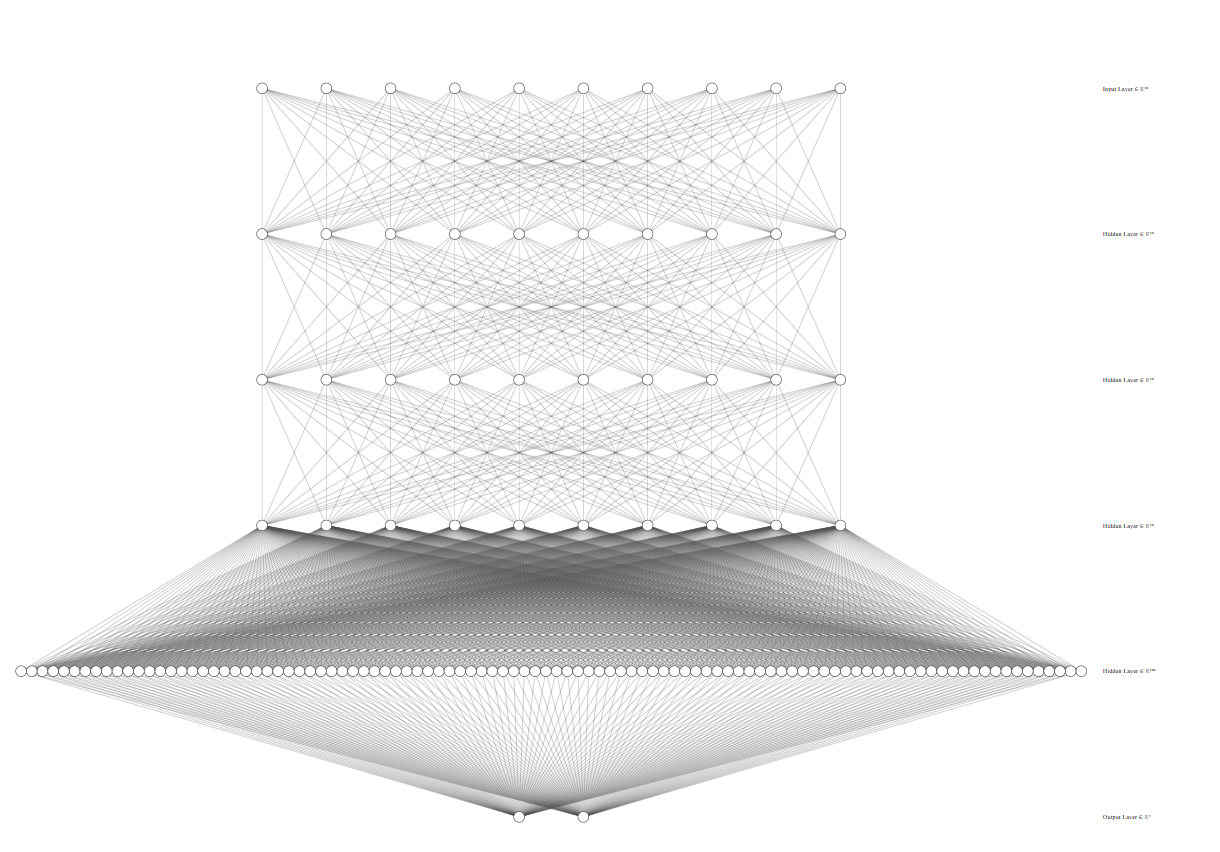

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=10)

In [ ]:
model = models.Sequential(
    [
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(2, activation='softmax')
    ]
)

In [ ]:
acc = []
for k in range(5):
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model.fit(Xtrain, ytrain, epochs=10, validation_data=(Xtest, ytest))
  acc.append(model.evaluate(Xtest, ytest))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.3930 - accuracy: 0.5862 - val_loss: 399.2217 - val_accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 89ms/step - loss: 309.0472 - accuracy: 0.5517 - val_loss: 98.7383 - val_accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 0s 93ms/step - loss: 75.2282 - accuracy: 0.5517 - val_loss: 24.0922 - val_accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 87ms/step - loss: 48.6546 - accuracy: 0.4483 - val_loss: 26.7319 - val_accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 87ms/step - loss: 53.7549 - accuracy: 0.4483 - val_loss: 25.7643 - val_accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 87ms/step - loss: 51.3646 - accuracy: 0.4483 - val_loss: 22.8872 - val_accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 92ms/step - loss: 45.0554 - accuracy: 0.4483 - val_loss: 19.1222 - val_accuracy: 0.7500
Epoch 8/10
1/1

In [ ]:
acc_d = acc[1:]
acc_array = np.array(acc_d)
averages = np.mean(acc_array, axis=0)
print("Promedios por posición:", averages)

[0.7355906367301941, 0.25]

In [ ]:
list(label_.keys())[np.argmax(model.predict(images_[4].reshape(1, 128, 128, 3)))]

1/1 [==============================] - 0s 83ms/step


1

# Conclusiones


La Arquitectura A es la mejor entre las tres, con un rendimiento perfecto en términos de clasificación de las imágenes. Esto podría indicar que la configuración de las capas y las neuronas fue adecuada para el conjunto de datos de 33 imágenes.
En  cuanto a las Arquitectura C y B tuvieron un desempeño significativamente peor, ambos con un alto loss y baja accuracy. Entre estas dos, ambas podrían ser consideradas las peores dado que sus métricas son idénticas.

Estos resultados podrían indicar que para este conjunto de datos específico, una red más simple con menos parámetros podría ser más efectiva, esto debido a la menor probabilidad de overfitting y a una mejor generalización a partir de un conjunto limitado de imágenes de entrenamiento. Además, vale la pena considerar la posibilidad de que las arquitecturas B y C pudieran estar sufriendo de problemas como inicialización inadecuada de pesos, elección de hiperparámetros no óptimos o necesidad de una mayor cantidad de datos para entrenar estructuras más complejas efectivamente.

| Arquitectura de la red neuronal         | Promedio de los loss | Accuracy |
|-----------------------------------------|----------------------|----------|
| A (25, 25, 2)                           | 0.00                 | 1.00     |
| B (5, 10, 15, 20, 2)                    | 0.73                 | 0.25     |
| C (10, 10, 10, 10, 100, 2)              | 0.73                 | 0.25     |
